# Load SP500 Earnings Training Data
This notebook demonstrates loading the `train.jsonl` saved by the downloader script `download_sp500_earnings.py`.
If you saved the dataset to a different directory, update the `output_dir` variable in the code cell.

In [1]:
from download_sp500_earnings import load_train_data
import pprint

c:\Users\colez\CS 410\earnings_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
earnings_transcripts_df = pd.read_parquet("hf://datasets/kurry/sp500_earnings_transcripts/parquet_files/part-0.parquet")

In [35]:
import numpy as np

np.random.choice(earnings_transcripts_df.symbol.unique(), size=10)

array(['LNC', 'MTG', 'FSLR', 'AVB', 'DAL', 'JWN', 'CBOE', 'SRE', 'DISCK',
       'MTD'], dtype=object)

In [15]:
earnings_transcripts_df

NameError: name 'earnings_transcripts_df' is not defined

In [138]:
len(earnings_index)

591

In [141]:
earnings_transcripts_df[(earnings_transcripts_df.year == 2020) & (earnings_transcripts_df.quarter == 4)].to_csv('earnings_transcripts_2020_Q4.csv', index=False)

In [19]:
earnings_transcripts_2020_q4_df = pd.read_csv('earnings_transcripts_2020_Q4.csv')
earnings_transcripts_2020_q4_df

FileNotFoundError: [Errno 2] No such file or directory: 'earnings_transcripts_2020_Q4.csv'

In [16]:
# create data structure that indexes by symbol, year, and quarter to cross reference with QA dataset
earnings_index = {}
for _, row in earnings_transcripts_df[(earnings_transcripts_df.year >= 2019) & (earnings_transcripts_df.year <= 2023)].iterrows():
    symbol = row['symbol']
    year = row['year']
    quarter = row['quarter']
    
    if symbol not in earnings_index:
        earnings_index[symbol] = {}
    if year not in earnings_index[symbol]:
        earnings_index[symbol][year] = {}
    
    earnings_index[symbol][year][quarter] = row['content']

In [17]:
import pickle

with open('earnings_index.pkl', 'wb') as f:
    pickle.dump(earnings_index, f)

In [1]:
import pickle


with open('earnings_index.pkl', 'rb') as f:
    earnings_index = pickle.load(f)

In [5]:
earnings_calls_qa_df = pd.read_json("hf://datasets/lamini/earnings-calls-qa/filtered_predictions.jsonl", lines=True)
earnings_calls_qa_df.head()

C:\Users\colez\AppData\Local\Temp\ipykernel_11044\1212511985.py:1: FutureWarning: Parsed string "Jan 13, 2022, 1:00 a.m. ET" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings_calls_qa_df = pd.read_json("hf://datasets/lamini/earnings-calls-qa/filtered_predictions.jsonl", lines=True)
C:\Users\colez\AppData\Local\Temp\ipykernel_11044\1212511985.py:1: FutureWarning: Parsed string "Jan 14, 2021, 1:00 a.m. ET" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings_calls_qa_df = pd.read_json("hf://datasets/lamini/earnings-calls-qa/filtered_predictions.jsonl", lines=True)
C:\Users\colez\AppData\Local\Temp\ipykernel_11044\12

,question,answer,date,transcript,q,ticker,predictions
0,What was TSMC's revenue in US dollar terms in ...,I do not know. The transcript does not provid...,2022-01-13 01:00:00,and for our industry-leading advanced and spec...,2021-Q4,TSM,"[{'class_id': 0, 'class_name': 'correct', 'pro..."
1,What was TSMC's EPS in 2019,I do not know. The transcript does not provid...,2022-01-13 01:00:00,and for our industry-leading advanced and spec...,2021-Q4,TSM,"[{'class_id': 0, 'class_name': 'correct', 'pro..."
2,What was TSMC's capex spending in 2019,I do not know. The transcript does not provid...,2022-01-13 01:00:00,and for our industry-leading advanced and spec...,2021-Q4,TSM,"[{'class_id': 0, 'class_name': 'correct', 'pro..."
3,What is the expected growth rate of global sma...,The expected growth rate of global smartphone...,2021-01-14 01:00:00,g demand for our advanced technologies in the ...,2020-Q4,TSM,"[{'class_id': 0, 'class_name': 'correct', 'pro..."
4,What is the expected penetration rate for 5G s...,The expected penetration rate for 5G smartpho...,2021-01-14 01:00:00,g demand for our advanced technologies in the ...,2020-Q4,TSM,"[{'class_id': 0, 'class_name': 'correct', 'pro..."


In [7]:
earnings_calls_qa_df.q.unique()

array(['2021-Q4', '2020-Q4', '2022-Q2', '2023-Q3', '2021-Q2', '2021-Q3',
       '2020-Q3', '2019-Q2', '2022-Q3', '2020-Q2', '2021-Q1', '2019-Q4',
       '2019-Q3', '2022-Q1', '2023-Q1', '2019-Q1', '2020-Q1', '2022-Q4',
       '2023-Q2'], dtype=object)

In [17]:
earnings_calls_qa_df[earnings_calls_qa_df['ticker'].isin(earnings_index.keys())][['question', 'answer', 'ticker', 'q']].to_csv('earnings_qa.csv', index=False)

In [150]:
for idx, row in earnings_transcripts_2020_q4_df.iterrows():
    print(idx)
    ticker = row.symbol
    year = row.year
    quarter = row.quarter
    content = row.content

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [151]:
import chromadb
from chromadb.config import Settings
import spacy
from sentence_transformers import SentenceTransformer, util
from langchain_text_splitters import RecursiveCharacterTextSplitter

# split doc into sentences
nlp = spacy.load("en_core_web_sm") # spacy model for splitting text by sentences
model = SentenceTransformer('FinLang/finance-embeddings-investopedia') # embedding model to generate document structure and embedding for retrieval

# Initialize RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,           # Size of each chunk in characters
    chunk_overlap=200,         # Overlap between chunks to preserve context
    separators=["\n\n", "\n", ". ", " "]  # Separators to split on
)

# VectorDB setup
client = chromadb.PersistentClient(
    path="./chroma_db",
    settings=Settings()
)

# set up the vector db for structured chunks
earnings_transcripts_structured_collection_name = "earnings_transcripts_structured"
try:
    client.get_collection(earnings_transcripts_structured_collection_name)
    client.delete_collection(earnings_transcripts_structured_collection_name)
    print(f"Collection '{earnings_transcripts_structured_collection_name}' deleted.")
except:
    print(f"Collection '{earnings_transcripts_structured_collection_name}' does not exist.")

earnings_transcripts_structured_collection = client.create_collection(name=earnings_transcripts_structured_collection_name)

# set up the vector db for unstructured chunks
earnings_transcripts_unstructured_collection_name = "earnings_transcripts_unstructured"
try:
    client.get_collection(earnings_transcripts_unstructured_collection_name)
    client.delete_collection(earnings_transcripts_unstructured_collection_name)
    print(f"Collection '{earnings_transcripts_unstructured_collection_name}' deleted.")
except:
    print(f"Collection '{earnings_transcripts_unstructured_collection_name}' does not exist.")

earnings_transcripts_unstructured_collection = client.create_collection(name=earnings_transcripts_unstructured_collection_name)

for idx, row in earnings_transcripts_2020_q4_df.iterrows():
    ticker = row.symbol
    year = row.year
    quarter = row.quarter
    content = row.content

    print(f"Generating embeddings for {ticker} Q{quarter} {year} ({idx + 1} out of {len(earnings_transcripts_2020_q4_df)})")
    doc = nlp(content)

    sentences = [sent.text for sent in doc.sents]

    # Create embeddings for each sentence
    embeddings = model.encode(sentences)
    similarities = [util.cos_sim(embeddings[i], embeddings[i+1]) for i in range(len(embeddings)-1)]

    # Simple threshold-based segmentation
    paragraphs = []
    current = [sentences[0]]
    for i, sim in enumerate(similarities):
        if sim < 0.4:  # tune this threashold
            paragraphs.append(" ".join(current))
            current = []
        current.append(sentences[i+1])
    paragraphs.append(" ".join(current))

    # Create a single text string from all paragraphs
    full_text = "\n\n".join(paragraphs)

    # Split the text into chunks
    chunks = splitter.split_text(full_text)

    # Generate embeddings
    chunk_embeddings = model.encode(chunks)

    # Generate ids for VectorDB insertion
    chunk_ids = [f"{ticker}_{year}_{quarter}_{id}" for id in range(len(chunks))]
    earnings_transcripts_structured_collection.add(
        ids=chunk_ids,
        embeddings=chunk_embeddings,
        metadatas=[{
            "source": id,
            "year": year,
            "quarter": quarter,
            "ticker": ticker
        } for id in chunk_ids],
        documents=chunks
    )

    # Split the text into chunks
    chunks = splitter.split_text(content)

    # Generate embeddings
    chunk_embeddings = model.encode(chunks)

    # Generate ids for VectorDB insertion
    chunk_ids = [f"A_{year}_{quarter}_{id}" for id in range(len(chunks))]
    earnings_transcripts_unstructured_collection.add(
        ids=chunk_ids,
        embeddings=chunk_embeddings,
        metadatas=[{
            "source": id,
            "year": year,
            "quarter": quarter,
            "ticker": ticker
        } for id in chunk_ids],
        documents=chunks
    )

Collection 'earnings_transcripts_structured' deleted.
Collection 'earnings_transcripts_unstructured' deleted.
Generating embeddings for A Q4 2020 (1 out of 553)
Generating embeddings for AAPL Q4 2020 (2 out of 553)
Generating embeddings for AAPL Q4 2020 (2 out of 553)
Generating embeddings for ABBV Q4 2020 (3 out of 553)
Generating embeddings for ABBV Q4 2020 (3 out of 553)
Generating embeddings for ABNB Q4 2020 (4 out of 553)
Generating embeddings for ABNB Q4 2020 (4 out of 553)
Generating embeddings for ABT Q4 2020 (5 out of 553)
Generating embeddings for ABT Q4 2020 (5 out of 553)
Generating embeddings for ACGL Q4 2020 (6 out of 553)
Generating embeddings for ACGL Q4 2020 (6 out of 553)
Generating embeddings for ACN Q4 2020 (7 out of 553)
Generating embeddings for ACN Q4 2020 (7 out of 553)
Generating embeddings for ADBE Q4 2020 (8 out of 553)
Generating embeddings for ADBE Q4 2020 (8 out of 553)
Generating embeddings for ADI Q4 2020 (9 out of 553)
Generating embeddings for ADI Q4 2

In [4]:
import pandas as pd

earnings_calls_qa_df = pd.read_csv('earnings_qa.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'earnings_qa.csv'

In [ ]:
earnings_calls_qa_df[(earnings_calls_qa_df.ticker=='A') & (earnings_calls_qa_df.q=='2020-Q4')]

,question,answer,ticker,q
3417,What was the growth rate of the NASD business ...,The growth rate of the NASD business in 2020-...,A,2020-Q4
3418,What was the growth rate of the cell analysis ...,The growth rate of the cell analysis business...,A,2020-Q4
3419,What was the growth rate of the biopharma busi...,The growth rate of the biopharma business in ...,A,2020-Q4
4635,What is the current revenue for the cell analy...,The current revenue for the cell analysis bus...,A,2020-Q4
4636,What is the growth rate of the cell analysis b...,The growth rate of the cell analysis business...,A,2020-Q4
...,...,...,...,...
186645,What was the operating margin expansion for Ag...,The operating margin expansion for Agilent's ...,A,2020-Q4
186646,What was the growth rate of Agilent's NASD bus...,The growth rate of Agilent's NASD business in...,A,2020-Q4
204768,What was the revenue growth rate for the Agile...,The revenue growth rate for the Agilent Cross...,A,2020-Q4
204769,What was the core revenue growth rate for the ...,The core revenue growth rate for the Agilent ...,A,2020-Q4


In [152]:
idx = 2
query = earnings_calls_qa_df[(earnings_calls_qa_df.ticker=='A') & (earnings_calls_qa_df.q=='2020-Q4')].iloc[idx].question
answer = earnings_calls_qa_df[(earnings_calls_qa_df.ticker=='A') & (earnings_calls_qa_df.q=='2020-Q4')].iloc[idx].answer
query_embedding = model.encode(query)

pprint.pprint(f"Query: {query}")
pprint.pprint(f"Answer: {answer}")

structured_results = earnings_transcripts_structured_collection.query(
    query_embeddings=[query_embedding],
    n_results=10
)
structured_text_results = "\n".join(f"{i+1}. {item}" for i, item in enumerate(structured_results['documents'][0]))
pprint.pprint(f"Structured Results: {structured_text_results}")

unstructured_results = earnings_transcripts_unstructured_collection.query(
    query_embeddings=[query_embedding],
    n_results=10
)
unstructured_text_results = "\n".join(f"{i+1}. {item}" for i, item in enumerate(unstructured_results['documents'][0]))
pprint.pprint(f"Unstructured Results: {unstructured_text_results}")

'Query: What was the growth rate of the biopharma business in 2020-Q4'
'Answer:  The growth rate of the biopharma business in 2020-Q4 was 12%.'
('Structured Results: 1. Life Sciences & Healthcare grew 24%. Growth in the '
 'quarter was driven by data and analytics, platform development to support '
 'new business models and client investments to improve R&D efficiency. '
 'Business information and media delivered 16.2% growth in the quarter. '
 'Financial services grew 16.1% with growth coming from traditional banking, '
 'insurance and, to a lesser degree, wealth management. Software & Hi-Tech '
 'grew 14.3% in the quarter. Travel and Consumer returned to growth and '
 'increased 5.4% year-over-year. In Q4, we saw strong growth from our consumer '
 'clients, along with solid and improving performance within retail as clients '
 'made investments in response to the dramatic changes in their operating '
 'environments. Finally, our emerging vertical delivered 13.1% growth, driven '
 'by

In [95]:
import pprint

structured_evaluation_prompt = f"""
    You are a helpful financial assistant. Given a query/answer pair and a list of excerpts from a earnings transcript, check to see if any the excerpts contain the answer to the question.
    Return a 1 if the given answer is contained in on of the excerpts, a 0 if not. Don't return an additional text.

    Question: {query}
    Answer: {answer}
    Excerpts: {structured_text_results}
""".format(
)
pprint.pprint(structured_evaluation_prompt)

unstructured_evaluation_prompt = f"""
    You are a helpful financial assistant. Given a query/answer pair and a list of excerpts from a earnings transcript, check to see if any the excerpts contain the answer to the question.
    Return a 1 if the given answer is contained in on of the excerpts, a 0 if not. Don't return an additional text.

    Question: {query}
    Answer: {answer}
    Excerpts: {unstructured_text_results}
""".format(
)
pprint.pprint(unstructured_evaluation_prompt)

('\n'
 '    You are a helpful financial assistant. Given a query/answer pair and a '
 'list of excerpts from a earnings transcript, check to see if any the '
 'excerpts contain the answer to the question.\n'
 '    Return a 1 if the given answer is contained in on of the excerpts, a 0 '
 "if not. Don't return an additional text.\n"
 '\n'
 '    Question: What was the growth rate of the biopharma business in 2020-Q4\n'
 '    Answer:  The growth rate of the biopharma business in 2020-Q4 was 12%.\n'
 '    Excerpts: 1. Reported growth was stronger, at 8.5%, currency contributed '
 '1.7%, while M&A added 1.2 points of growth. From an end market perspective, '
 'pharma, our largest market, showed strength across all regions, and '
 'delivered 12% growth in the quarter. Both small and large molecule '
 'businesses grew, with large molecule posting strong double-digit growth. We '
 'continue to invest and build capabilities in faster growth biopharma '
 'markets, and offer leading solutions acro

In [97]:
from mistralai import Mistral

client = Mistral(api_key="MzpjxkBHuqeNhEzIHLZ8SQ3eS8r0ouEV")

response = client.chat.complete(
    model="mistral-large-latest",
    messages=[
        {"role": "user", "content": structured_evaluation_prompt}
    ]
)

pprint.pprint(response.choices[0].message.content)

response = client.chat.complete(
    model="mistral-large-latest",
    messages=[
        {"role": "user", "content": unstructured_evaluation_prompt}
    ]
)

pprint.pprint(response.choices[0].message.content)

'1'
'0'
'0'


In [100]:
structured_results = earnings_transcripts_structured_collection.query(
    query_embeddings=[query_embedding],
    n_results=10,
    where={
        "ticker": "B"
    }
)
structured_results

{'ids': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[]],
 'distances': [[]]}

In [184]:
from tqdm import tqdm
import numpy as np
import time

client = Mistral(api_key="MzpjxkBHuqeNhEzIHLZ8SQ3eS8r0ouEV")

def get_recall(query, answer, results):
    evaluation_prompt = f"""
        You are a helpful financial assistant. Given a query/answer pair and a list of excerpts from a earnings transcript, check to see if any the excerpts contain the answer to the question.
        Return a 1 if the given answer is contained in one of the excerpts, a 0 if not. Don't return any additional text.

        Question: {query}
        Answer: {answer}
        Excerpts: {results}
    """

    while True:
        try:
            response = client.chat.complete(
                model="mistral-large-latest",
                messages=[
                    {"role": "user", "content": evaluation_prompt}
                ]
            )
            break
        except:
            pprint.pprint("Rate limit hit, retrying in 1 minute...")
            time.sleep(60)

    try:
        return int(response.choices[0].message.content[0])
    except:
        return 0

structured_recalls = []
unstructured_recalls = []
for i in range(9):
    pprint.pprint(f"Evaluating sample set {i+1}")
    structured_recall = []
    unstructured_recall = []
    for _, row in tqdm(earnings_calls_qa_df[earnings_calls_qa_df.q=='2020-Q4'].sample(100).iterrows()):
        query = row.question
        answer = row.answer
        ticker = row.ticker
        query_embedding = model.encode(query)

        # pprint.pprint(f"Query: {query}")
        # pprint.pprint(f"Answer: {answer}")
        # pprint.pprint(f"Ticker: {ticker}")

        structured_results = earnings_transcripts_structured_collection.query(
            query_embeddings=[query_embedding],
            n_results=10,
            where={
                "ticker": ticker
            }
        )
        structured_text_results = "\n".join(f"{i+1}. {item}" for i, item in enumerate(structured_results['documents'][0]))
        # pprint.pprint(f"Structured Results: {structured_text_results}")
        structured_recall.append(get_recall(query, answer, structured_text_results))

        unstructured_results = earnings_transcripts_unstructured_collection.query(
            query_embeddings=[query_embedding],
            n_results=10,
            where={
                "ticker": ticker
            }
        )
        unstructured_text_results = "\n".join(f"{i+1}. {item}" for i, item in enumerate(unstructured_results['documents'][0]))
        # pprint.pprint(f"Unstructured Results: {unstructured_text_results}")
        unstructured_recall.append(get_recall(query, answer, unstructured_text_results))

    structured_recalls.append(np.mean(structured_recall))
    unstructured_recalls.append(np.mean(unstructured_recall))

pprint.pprint(structured_recalls)
pprint.pprint(unstructured_recalls)


'Evaluating sample set 1'


30it [00:56,  1.51s/it]

'Rate limit hit, retrying in 1 minute...'


31it [01:57, 19.46s/it]

'Rate limit hit, retrying in 1 minute...'


71it [04:22,  1.28s/it]

'Rate limit hit, retrying in 1 minute...'


100it [06:22,  3.83s/it]


'Evaluating sample set 2'


90it [03:30,  1.59s/it]

'Rate limit hit, retrying in 1 minute...'


100it [04:56,  2.97s/it]


'Evaluating sample set 3'


22it [00:39,  2.06s/it]

'Rate limit hit, retrying in 1 minute...'


57it [02:47,  1.67s/it]

'Rate limit hit, retrying in 1 minute...'


100it [05:19,  3.19s/it]


'Evaluating sample set 4'


7it [00:12,  1.52s/it]

'Rate limit hit, retrying in 1 minute...'


79it [03:49,  1.66s/it]

'Rate limit hit, retrying in 1 minute...'


100it [05:35,  3.36s/it]


'Evaluating sample set 5'


15it [00:32,  1.61s/it]

'Rate limit hit, retrying in 1 minute...'


53it [03:04,  3.14s/it]

'Rate limit hit, retrying in 1 minute...'


100it [05:57,  3.58s/it]


'Evaluating sample set 6'


100it [04:05,  2.46s/it]


'Evaluating sample set 7'


48it [01:34,  1.59s/it]

'Rate limit hit, retrying in 1 minute...'


100it [04:49,  2.90s/it]


'Evaluating sample set 8'


100it [04:23,  2.64s/it]


'Evaluating sample set 9'


18it [00:43,  2.34s/it]

'Rate limit hit, retrying in 1 minute...'


64it [03:21,  1.86s/it]

'Rate limit hit, retrying in 1 minute...'


100it [06:07,  3.68s/it]

[0.46, 0.44, 0.45, 0.42, 0.36, 0.47, 0.44, 0.36, 0.51]
[0.18, 0.15, 0.13, 0.11, 0.11, 0.19, 0.15, 0.19, 0.18]


In [1]:
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer

# VectorDB setup
print("Connecting to VectorDB")
client = chromadb.PersistentClient(
    path="../data/chroma_db",
    settings=Settings()
)
print("Loading Model")
model = SentenceTransformer('FinLang/finance-embeddings-investopedia')
print("Embedding query")
query_embedding = model.encode("Hello")
print("Getting collection")
collection = client.get_collection('earnings_transcripts')
print("Querying collection")
results = collection.query(
    query_embeddings=[query_embedding],
    n_results=10,
)
results

Connecting to VectorDB
Loading Model
Embedding query
Getting collection
Querying collection


{'ids': [['A_2020_4_37',
   'A_2020_4_47',
   'A_2020_4_13',
   'A_2020_4_24',
   'A_2020_4_56',
   'A_2020_4_73',
   'A_2020_4_65',
   'A_2020_4_0',
   'A_2020_4_29',
   'A_2020_4_71']],
 'embeddings': None,
 'documents': [['. So very pleased, and we continue to expect good growth in that business.',
   "Mike McMullen: You're quite welcome, Tycho.\nOperator: Your next question comes from the line of Brandon Couillard with Jefferies. Your line is open.\n\n\nBrandon Couillard: Hi, thanks. Good afternoon;\n\nMike, a couple of questions on LSAG.\n Mike McMullen: Sure.\n Brandon Couillard: I'm curious, if you could speak to the order book in the fourth quarter, and to the extent that you may have built some backlog there, and curious to speak to perhaps the margin compression in the fourth quarter, but that was mostly mix or is today's dynamics there?\n Mike McMullen: Happy to see you, Brandon.",
   "Thank you for being on the call today, and I look forward to your questions. I will now ha

In [ ]:
pprint.pprint(queries[3])
pprint.pprint(answers[3])
pprint.pprint(structured_results_list[3])
pprint.pprint(unstructured_results_list[3])

('What was the full year EPS for 2020, and what was the increase in EPS '
 'compared to the previous year? ')
(' The full year EPS for 2020 was $4.96, and the increase in EPS compared to '
 'the previous year was 11.7%.')
('1. For the full year, earned premium was down 0.9%. Our total benefit ratio '
 'came in at 51.6%, which was 250 basis points higher than Q4 2019.\n'
 '\n'
 'Pandemic conditions continue to be very relevant when analyzing our benefit '
 'ratio. Due to the recent increase in infection rates, we estimate incurred '
 'claims impact of $72 million of which $58 million was an increase to IBNR, '
 'resulting in an impact to the benefit ratio of 5.1 percentage points from '
 'COVID related claims. This is somewhat offset by favorable non-COVID related '
 'claims activity, generating an underlying benefit ratio of 46.5%. COVID and '
 'non-COVID related claims tend to have a negative correlation, which clearly '
 'can be seen in our quarterly results throughout 2020.\n'
 '\n'

In [181]:
1000000000 / len(structured_text_results)/3

47612.24586963767

In [ ]:
[.51,
[.12,

In [2]:
earnings_transcripts_df

NameError: name 'earnings_transcripts_df' is not defined

In [5]:
import pandas as pd

earnings_transcripts_df = pd.read_csv('../data/earnings_transcripts.csv')

In [18]:
with open("../data/transcript.txt", "w", encoding="utf-8") as f:
    f.write(earnings_transcripts_df.content[0])

In [7]:
semantic_alignment_rates = [.51, 0.46, 0.44, 0.45, 0.42, 0.36, 0.47, 0.44, 0.36, 0.51]
recursive_alignment_rates = [.12, 0.18, 0.15, 0.13, 0.11, 0.11, 0.19, 0.15, 0.19, 0.18]

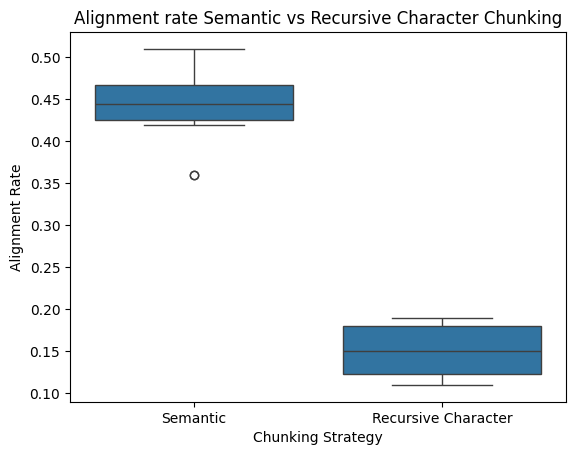

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    "Alignment Rate": semantic_alignment_rates + recursive_alignment_rates,
    "Chunking Strategy": ["Semantic"]*len(semantic_alignment_rates) + ["Recursive Character"]*len(recursive_alignment_rates)
})

sns.boxplot(data=df, x="Chunking Strategy", y="Alignment Rate")
plt.title("Alignment rate Semantic vs Recursive Character Chunking")
plt.savefig("../docs/chunking_performance.png")
plt.show()

In [ ]:
apple_transcript = str(earnings_transcripts_df[
    (earnings_transcripts_df.symbol=="AAPL") & (earnings_transcripts_df.year==2020) & (earnings_transcripts_df.quarter==4)
].content[21])

"Operator: Good day everyone and welcome to the Apple Inc. Fourth Quarter Fiscal Year 2020 Earnings Conference Call. Today’s call is being recorded. At this time for opening remarks and introductions, I would like to turn things over to Tejas Gala, Senior Analyst, Corporate Finance and Investor Relations. Please go ahead, sir.\nTejas Gala: Thank you. Good afternoon and thank you for joining us. Speaking first today is Apple’s CEO, Tim Cook, and he will be followed by CFO, Luca Maestri. After that, we’ll open the call to questions from analysts. Please note that some of the information you’ll hear during the discussion today, will consist of our forward-looking statements including without limitation those regarding revenue, gross margin, operating expenses, other income and expense, taxes, capital allocation and future business outlook, including the potential impact of COVID-19 on the company’s business, and results of operations. These statements involve risks and uncertainties that 

In [ ]:
doc = nlp(content)

sentences = [sent.text for sent in doc.sents]

# Create embeddings for each sentence
embeddings = model.encode(sentences)
similarities = [util.cos_sim(embeddings[i], embeddings[i+1]) for i in range(len(embeddings)-1)]

# Simple threshold-based segmentation
paragraphs = []
current = [sentences[0]]
for i, sim in enumerate(similarities):
    if sim < 0.4:  # tune this threashold
        paragraphs.append(" ".join(current))
        current = []
    current.append(sentences[i+1])
paragraphs.append(" ".join(current))

# Create a single text string from all paragraphs
full_text = "\n\n".join(paragraphs)

# Split the text into chunks
chunks = splitter.split_text(full_text)

In [13]:
from IPython.display import display, HTML

s1 = "This is string one."
s2 = "This is string two."

html = f"""
<div style="display: flex; gap: 20px;">
    <pre>{s1}</pre>
    <pre>{s2}</pre>
</div>
"""

display(HTML(html))